# 0.) Import the Credit Card Fraud Data From CCLE

In [37]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [38]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [39]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/fraudTest.csv")

In [40]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

In [43]:
df_select.columns

Index(['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud'], dtype='object')

In [44]:
type(df_select["trans_date_trans_time"][0])

str

In [45]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
dir(df_select["trans_date_trans_time"][0])

<ipython-input-45-365e07ad1902>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])


['__add__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_date_repr',
 '_freq',
 '_freqstr',
 '_repr_base',
 '_round',
 '_set_freq',
 '_short_repr',
 '_time_repr',
 'asm8',
 'astimezone',
 'ceil',
 'combine',
 'ctime',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'dst',
 'floor',
 'fold',
 'freq',
 'freqstr',
 'fromisocalendar',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_

In [46]:
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [48]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [49]:
ros = RandomOverSampler(random_state = 0)
ros.fit(X_train,y_train)
over_X, over_y = ros.fit_resample(X_train,y_train)

In [50]:
rus = RandomUnderSampler(random_state = 0)
rus.fit(X_train,y_train)
under_X, under_y = ros.fit_resample(X_train,y_train)

In [51]:
oversample = SMOTE()

In [52]:
smote_X,smote_y = oversample.fit_resample(X_train,y_train)

# 3.) Train three logistic regression models 

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
over_reg = LogisticRegression().fit(over_X, over_y)

In [55]:
under_reg = LogisticRegression().fit(under_X, under_y)

In [56]:
smote_reg = LogisticRegression().fit(smote_X,smote_y)

# 4.) Test the three models

In [57]:
y_predover = over_reg.predict(X_test)
y_predover

array([1, 1, 1, ..., 1, 1, 0])

In [58]:
y_predunder = under_reg.predict(X_test)
y_predunder

array([1, 1, 1, ..., 1, 1, 0])

In [59]:
y_predsmote = smote_reg.predict(X_test)
y_predsmote

array([1, 1, 1, ..., 1, 1, 0])

# 5.) Which performed best in Out of Sample metrics?

In [60]:
over_reg.score(X_test, y_test)

0.16868207010724826

In [61]:
from sklearn import metrics

In [62]:
cnf_matrix = metrics.confusion_matrix(y_test, y_predover)
cnf_matrix

array([[ 27483, 138566],
       [    28,    639]])

In [63]:
under_reg.score(X_test, y_test)


0.16868207010724826

In [64]:
cnf_matrix2 = metrics.confusion_matrix(y_test, y_predunder)
cnf_matrix2

array([[ 27483, 138566],
       [    28,    639]])

In [65]:
smote_reg.score(X_test, y_test)

0.17168718059454402

In [66]:
cnf_matrix3 = metrics.confusion_matrix(y_test, y_predsmote)
cnf_matrix3

array([[ 27985, 138064],
       [    29,    638]])

From the above score results, we can conclude that SMOTE performed best in out of sample metrics because it has the highest acuuracy. From the above matrix results: the diagonal values are the actual predictions, we can see that there are more actual predictions in the smote regression output. SMOTE performs better than others probably because it generates synthetic examples instead of oversampling or undersampling with replacement. 

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [67]:
raw_temp = pd.concat([X_train,y_train],axis =1)

In [68]:
import matplotlib.pyplot as plt

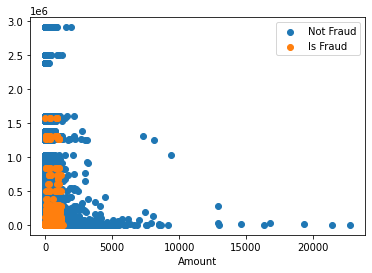

In [69]:
plt.scatter(raw_temp[raw_temp["is_fraud"]==0]["amt"],raw_temp[raw_temp["is_fraud"]==0]["city_pop"])
plt.scatter(raw_temp[raw_temp["is_fraud"]==1]["amt"],raw_temp[raw_temp["is_fraud"]==1]["city_pop"])
plt.legend(["Not Fraud","Is Fraud"])
plt.xlabel("Amount")
plt.show()

In [70]:
smoke_temp = pd.concat([smote_X,smote_y],axis =1)

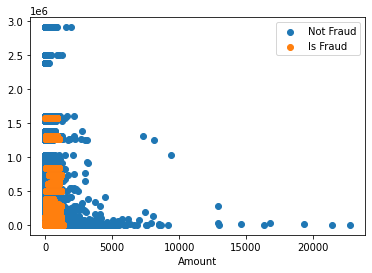

In [71]:
plt.scatter(smoke_temp[smoke_temp["is_fraud"]==0]["amt"],smoke_temp[smoke_temp["is_fraud"]==0]["city_pop"])
plt.scatter(smoke_temp[smoke_temp["is_fraud"]==1]["amt"],smoke_temp[smoke_temp["is_fraud"]==1]["city_pop"])
plt.legend(["Not Fraud","Is Fraud"])
plt.xlabel("Amount")
plt.show()